# Case Study - Portfolio Optimization
In this case study, we will build two $10,000 investment portfolios containing four stocks. The first portfolio will have an equal weighting between the stocks. The second portfolio will be optimized with a weighting allocation that provides the best return, adjusted for risk. To build these two portfolios, we will:
1. Import two years of data for four stocks
2. Build the initial portfolio with equal weighting to each of the stocks
3. Analyze and visualize the equal-weighted portfolio
4. Generate 10,000 portfolio scenarios with random weighting to each of the stocks
5. Identify the optimal portfolio from the scenarios and visualize the results

## Import Packages & Connect to Data

In [3]:
# Import packages needed for case study
!pip install yfinance
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import datetime as dt
import yfinance as yf
%matplotlib inline

In [4]:
startdate = dt.date(2019,1,1)
enddate = dt.date(2022, 12, 31)
stock = {}
stock_list = ['AMD', 'AAPL', 'MSFT', 'ORCL']
for i in stock_list:
    stock[i] = yf.download(i, startdate, enddate)[['Adj Close']] 
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
stock['ORCL'].head()

,Adj Close
Date,
2019-01-02 00:00:00-05:00,42.138142
2019-01-03 00:00:00-05:00,41.728127
2019-01-04 00:00:00-05:00,43.526596
2019-01-07 00:00:00-05:00,44.216167
2019-01-08 00:00:00-05:00,44.616871


In [6]:
stock

{'AMD':                            Adj Close
 Date                                
 2019-01-02 00:00:00-05:00  18.830000
 2019-01-03 00:00:00-05:00  17.049999
 2019-01-04 00:00:00-05:00  19.000000
 2019-01-07 00:00:00-05:00  20.570000
 2019-01-08 00:00:00-05:00  20.750000
 ...                              ...
 2022-12-23 00:00:00-05:00  64.519997
 2022-12-27 00:00:00-05:00  63.270000
 2022-12-28 00:00:00-05:00  62.570000
 2022-12-29 00:00:00-05:00  64.820000
 2022-12-30 00:00:00-05:00  64.769997
 
 [1008 rows x 1 columns],
 'AAPL':                             Adj Close
 Date                                 
 2019-01-02 00:00:00-05:00   38.105137
 2019-01-03 00:00:00-05:00   34.309586
 2019-01-04 00:00:00-05:00   35.774235
 2019-01-07 00:00:00-05:00   35.694614
 2019-01-08 00:00:00-05:00   36.375061
 ...                               ...
 2022-12-23 00:00:00-05:00  131.860001
 2022-12-27 00:00:00-05:00  130.029999
 2022-12-28 00:00:00-05:00  126.040001
 2022-12-29 00:00:00-05:00  129.61

In [10]:
# Examine the 'AMD' Adj Close from the stocks dictionary
stock['AMD']

,Adj Close
Date,
2019-01-02 00:00:00-05:00,18.830000
2019-01-03 00:00:00-05:00,17.049999
2019-01-04 00:00:00-05:00,19.000000
2019-01-07 00:00:00-05:00,20.570000
2019-01-08 00:00:00-05:00,20.750000
...,...
2022-12-23 00:00:00-05:00,64.519997
2022-12-27 00:00:00-05:00,63.270000
2022-12-28 00:00:00-05:00,62.570000


## Create the Equal-Weighted Portfolio
To create the equal-weighted portfolio, we need to add some additional columns to the DataFrames in the `stocks` dictionary. The three columns that we will build are:
* Normalized Return = Adjusted Close / Adjusted Close on the `startdate` of the portfolio
* Allocation = Normalized Return * 0.25 (equal weighting for each of the four stocks)
* Position Value = Allocation * 10,000 (value of the portfolio)

In [11]:
# Create 'Normalized Return' column for each stock
for stock_name, stock_data in stock.items():
    first_Adj_close = stock_data.iloc[0]['Adj Close']
    stock_data['normalized_Return'] = stock_data['Adj Close'] / first_Adj_close
    

C:\Users\Okundaye Joshua\AppData\Local\Temp\ipykernel_14500\1344789314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['normalized_Return'] = stock_data['Adj Close'] / first_Adj_close


In [12]:
stock['MSFT'].head()

,Adj Close,normalized_Return
Date,,
2019-01-02 00:00:00-05:00,96.874687,1.000000
2019-01-03 00:00:00-05:00,93.310867,0.963212
2019-01-04 00:00:00-05:00,97.650688,1.008010
2019-01-07 00:00:00-05:00,97.775230,1.009296
2019-01-08 00:00:00-05:00,98.484161,1.016614


In [13]:
# Create allocation for each stock - equally weighted in our initial portfolio
for stock_name, stock_data in stock.items():
    stock_data['Allocation'] = stock_data['normalized_Return'] * 0.25

C:\Users\Okundaye Joshua\AppData\Local\Temp\ipykernel_14500\1142807207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Allocation'] = stock_data['normalized_Return'] * 0.25


In [14]:
stock['ORCL'].head()

,Adj Close,normalized_Return,Allocation
Date,,,
2019-01-02 00:00:00-05:00,42.138142,1.000000,0.250000
2019-01-03 00:00:00-05:00,41.728127,0.990270,0.247567
2019-01-04 00:00:00-05:00,43.526596,1.032950,0.258238
2019-01-07 00:00:00-05:00,44.216167,1.049315,0.262329
2019-01-08 00:00:00-05:00,44.616871,1.058824,0.264706


In [15]:
# Set the value of the portfolio to $10k
# Create allocation for each stock - equally weighted in our initial portfolio
for stock_name, stock_data in stock.items():
    stock_data['position_value'] = stock_data['Allocation'] * 10000

C:\Users\Okundaye Joshua\AppData\Local\Temp\ipykernel_14500\1943339154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['position_value'] = stock_data['Allocation'] * 10000


In [16]:
stock['AMD'].head()

,Adj Close,normalized_Return,Allocation,position_value
Date,,,,
2019-01-02 00:00:00-05:00,18.830000,1.000000,0.250000,2500.000000
2019-01-03 00:00:00-05:00,17.049999,0.905470,0.226367,2263.674895
2019-01-04 00:00:00-05:00,19.000000,1.009028,0.252257,2522.570377
2019-01-07 00:00:00-05:00,20.570000,1.092406,0.273101,2731.014309
2019-01-08 00:00:00-05:00,20.750000,1.101965,0.275491,2754.912385


## Visualize the Portfolio Performance
To visualize the performance of the portfolio, we can create two line charts that show the return of the portfolio, and the return of the individual stocks, over time. Let's build a new DataFrame that contains just the `position value` for each stock, as well as the total value for the portfolio. We can use this DataFrame to create the two visuals.

In [17]:
# Create position_values dictionary
Positional_Values = {}
for stock_name, stock_data in stock.items():
    Positional_Values[stock_name] = stock_data['position_value']
Positional_Values

{'AMD': Date
 2019-01-02 00:00:00-05:00    2500.000000
 2019-01-03 00:00:00-05:00    2263.674895
 2019-01-04 00:00:00-05:00    2522.570377
 2019-01-07 00:00:00-05:00    2731.014309
 2019-01-08 00:00:00-05:00    2754.912385
                                 ...     
 2022-12-23 00:00:00-05:00    8566.117486
 2022-12-27 00:00:00-05:00    8400.159415
 2022-12-28 00:00:00-05:00    8307.222510
 2022-12-29 00:00:00-05:00    8605.947950
 2022-12-30 00:00:00-05:00    8599.309201
 Name: position_value, Length: 1008, dtype: float64,
 'AAPL': Date
 2019-01-02 00:00:00-05:00    2500.000000
 2019-01-03 00:00:00-05:00    2250.981652
 2019-01-04 00:00:00-05:00    2347.074286
 2019-01-07 00:00:00-05:00    2341.850558
 2019-01-08 00:00:00-05:00    2386.493267
                                 ...     
 2022-12-23 00:00:00-05:00    8651.064623
 2022-12-27 00:00:00-05:00    8531.001950
 2022-12-28 00:00:00-05:00    8269.226361
 2022-12-29 00:00:00-05:00    8503.446730
 2022-12-30 00:00:00-05:00    8524.440

In [18]:
# Convert the position_values dictionary to a DataFrame
Positional_Values = pd.DataFrame(data = Positional_Values)

Positional_Values.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02 00:00:00-05:00,2500.000000,2500.000000,2500.000000,2500.000000
2019-01-03 00:00:00-05:00,2263.674895,2250.981652,2408.030158,2475.674348
2019-01-04 00:00:00-05:00,2522.570377,2347.074286,2520.025896,2582.375158
2019-01-07 00:00:00-05:00,2731.014309,2341.850558,2523.239900,2623.286513
2019-01-08 00:00:00-05:00,2754.912385,2386.493267,2541.534952,2647.059716


In [19]:
# Add 'Total' column to position values, summing the other columns
Positional_Values['Total'] = Positional_Values.sum(axis = 1)
Positional_Values

,AMD,AAPL,MSFT,ORCL,Total
Date,,,,,
2019-01-02 00:00:00-05:00,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000
2019-01-03 00:00:00-05:00,2263.674895,2250.981652,2408.030158,2475.674348,9398.361052
2019-01-04 00:00:00-05:00,2522.570377,2347.074286,2520.025896,2582.375158,9972.045718
2019-01-07 00:00:00-05:00,2731.014309,2341.850558,2523.239900,2623.286513,10219.391280
2019-01-08 00:00:00-05:00,2754.912385,2386.493267,2541.534952,2647.059716,10330.000319
...,...,...,...,...,...
2022-12-23 00:00:00-05:00,8566.117486,8651.064623,6160.793976,4778.803887,28156.779971
2022-12-27 00:00:00-05:00,8400.159415,8531.001950,6115.116693,4786.487935,27832.765992
2022-12-28 00:00:00-05:00,8307.222510,8269.226361,6052.406608,4748.068600,27376.924079


In [20]:
Positional_Values.round(1)

,AMD,AAPL,MSFT,ORCL,Total
Date,,,,,
2019-01-02 00:00:00-05:00,2500.0,2500.0,2500.0,2500.0,10000.0
2019-01-03 00:00:00-05:00,2263.7,2251.0,2408.0,2475.7,9398.4
2019-01-04 00:00:00-05:00,2522.6,2347.1,2520.0,2582.4,9972.0
2019-01-07 00:00:00-05:00,2731.0,2341.9,2523.2,2623.3,10219.4
2019-01-08 00:00:00-05:00,2754.9,2386.5,2541.5,2647.1,10330.0
...,...,...,...,...,...
2022-12-23 00:00:00-05:00,8566.1,8651.1,6160.8,4778.8,28156.8
2022-12-27 00:00:00-05:00,8400.2,8531.0,6115.1,4786.5,27832.8
2022-12-28 00:00:00-05:00,8307.2,8269.2,6052.4,4748.1,27376.9


Text(0, 0.5, 'Total value')

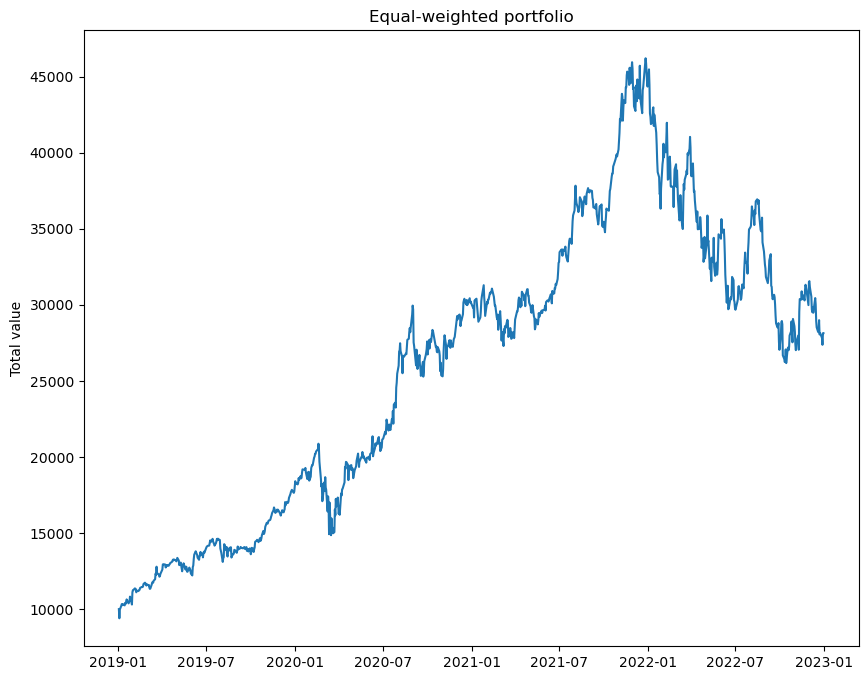

In [21]:
# View the total portfolio
plt.figure(figsize =(10,8))
plt.plot(Positional_Values['Total'])
plt.title('Equal-weighted portfolio')
plt.ylabel('Total value')

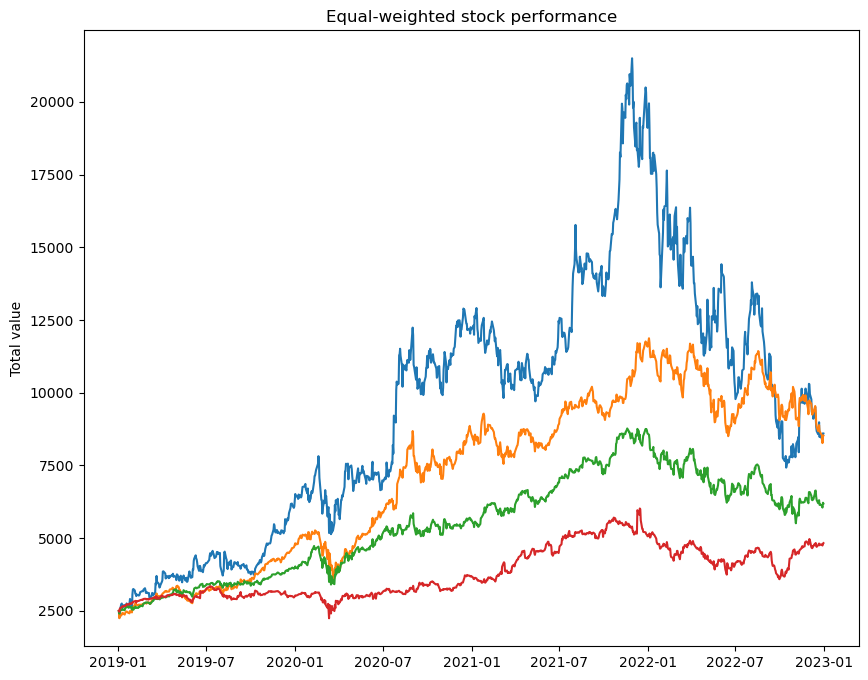

In [22]:
# View the four stocks in the portfolio
plt.figure(figsize =(10,8))
plt.plot(Positional_Values.iloc[:,0:4])
plt.title('Equal-weighted stock performance')
plt.ylabel('Total value');

## Calculate Performance Metrics for the Portfolio
Now that we have created and visualized the equal-weighted portfolio, we can calculate a few metrics to further measure the performance of the portfolio. We will create five performances metrics:
 * Cumulative Return
 * Mean Daily Return
 * Standard Deviation Daily Return
 * Sharpe Ratio
 * Annualized Sharpe Ratio

In [23]:
# Define the end and start value of the portfolio

start_value = Positional_Values['Total'][0]

end_value = Positional_Values['Total'][-1]

# Calculate the cumulative portfolio return as a percentage

cumulative_return = end_value/start_value - 1

print(cumulative_return)

1.814408237127434


In [24]:
# Create a 'Daily Returns' column
Positional_Values['Daily return'] = Positional_Values['Total'].pct_change()

Positional_Values['Daily return']

Date
2019-01-02 00:00:00-05:00         NaN
2019-01-03 00:00:00-05:00   -0.060164
2019-01-04 00:00:00-05:00    0.061041
2019-01-07 00:00:00-05:00    0.024804
2019-01-08 00:00:00-05:00    0.010823
                               ...   
2022-12-23 00:00:00-05:00    0.003513
2022-12-27 00:00:00-05:00   -0.011507
2022-12-28 00:00:00-05:00   -0.016378
2022-12-29 00:00:00-05:00    0.027885
2022-12-30 00:00:00-05:00    0.000133
Name: Daily return, Length: 1008, dtype: float64

In [25]:
# Calculate the mean Daily Return 
mean_daily_return = round(Positional_Values['Daily return'].mean(),5)

print(f'The mean daily return is:{mean_daily_return}')

The mean daily return is:0.00127


In [26]:
# Calculate the standard deviation of Daily Return 

std_daily_return = round(Positional_Values['Daily return'].std(),5)
print(f'The std daily return is:{std_daily_return}')

The std daily return is:0.02186


### Sharpe Ratio
Now, let's explore a risk-adjusted return metric called the sharpe ratio. The sharpe ratio helps us to quantify how much return we are getting for a given level of risk. When comparing two different investments, the asset with the higher sharpe ratio provides a higher return for the same amount of risk or the same return for a lower amount of risk. 

It is calculated by taking the average return of the portfolio, minus a risk free rate (such as government bonds), divided by the standard deviation of the return. In this case, we assume the risk-free rate is close 0 so we won't add it to the formula.

In [27]:
# Calculate the sharpe ratio
sharpe_ratio = mean_daily_return / std_daily_return

sharpe_ratio 

0.05809698078682525

In [28]:
# Calculate the annualized sharpe ratio
sharpe_ratio_annualized = sharpe_ratio * np.sqrt(252)
sharpe_ratio_annualized

0.9222609785138235

## Prepare Scenarios to Optimize Portfolio Weighting
We need to prepare our data ahead of generating our scenarios to optimize the portfolio weighting. We will:
 * Create a dictionary containing the adjusted close for each of our stocks: stock_adj_close
 * Create another dictionary that transforms the adjusted close for each day to a percent change from the previous day

In [29]:
# Create stock_adj_close dictionary
stock_adj_close = {}
for stock_name, stock_data in stock.items():
    stock_adj_close[stock_name] = stock_data['Adj Close']
stock_adj_close['AMD']

Date
2019-01-02 00:00:00-05:00    18.830000
2019-01-03 00:00:00-05:00    17.049999
2019-01-04 00:00:00-05:00    19.000000
2019-01-07 00:00:00-05:00    20.570000
2019-01-08 00:00:00-05:00    20.750000
                               ...    
2022-12-23 00:00:00-05:00    64.519997
2022-12-27 00:00:00-05:00    63.270000
2022-12-28 00:00:00-05:00    62.570000
2022-12-29 00:00:00-05:00    64.820000
2022-12-30 00:00:00-05:00    64.769997
Name: Adj Close, Length: 1008, dtype: float64

In [30]:
stock_adj_close = pd.DataFrame(data = stock_adj_close)
stock_adj_close.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02 00:00:00-05:00,18.830000,38.105137,96.874687,42.138142
2019-01-03 00:00:00-05:00,17.049999,34.309586,93.310867,41.728127
2019-01-04 00:00:00-05:00,19.000000,35.774235,97.650688,43.526596
2019-01-07 00:00:00-05:00,20.570000,35.694614,97.775230,44.216167
2019-01-08 00:00:00-05:00,20.750000,36.375061,98.484161,44.616871


In [31]:
# Create stock_returns DataFrames to see the day over day change in stock value
stock_returns = stock_adj_close.pct_change()

stock_returns.tail()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2022-12-23 00:00:00-05:00,0.010335,-0.002798,0.002267,0.004473
2022-12-27 00:00:00-05:00,-0.019374,-0.013878,-0.007414,0.001608
2022-12-28 00:00:00-05:00,-0.011064,-0.030685,-0.010255,-0.008027
2022-12-29 00:00:00-05:00,0.035960,0.028324,0.027630,0.013320
2022-12-30 00:00:00-05:00,-0.000771,0.002469,-0.004938,0.004177


## Build & Run 10,000 Portfolio Scenarios
Now that we've prepared our data, we're almost ready to run our scenarios. First, we need to build the structures required to generate these scenarios and store the output. To do this, we will use the `numpy.zeros()` function. 

This function creates arrays that are filled with zeros. After we run the scenarios, we replace these zeros with the corresponding output. The reason we create the arrays with zeros first is to give our arrays the correct shape before we replace them with the correct values.

We will create four different arrays:
 * weights_array - this array will have 10,000 rows and 4 columns and hold the weighting allocation for each stock
 * returns_array - this array will contain the portfolio return for each scenario
 * volatility_array - this array will contain the portfolio volatility for each scenario
 * sharpe_array - this array will contain the sharpe ratio for each scenario

In [34]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 10000

weights_array = np.zeros((scenarios, len(stock_returns.columns)))

weights_array

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [36]:
# Create additional blank arrays for scenario output
return_array = np.zeros(scenarios)
volatility_array =np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [48]:
# Import the random package and set the seeds
import random
random.seed(3)
np.random.seed(3)
for index in range(scenarios):
# Generate four random numbers for each index
    numbers = np.array(np.random.random(4))


# Divide each number by the sum of the numbers to generate the random weight
    weights = numbers/np.sum(numbers)


# Save the weights in weights_array
    weights_array[index, :] = weights
    
# Calculate the return for each scenario
    return_array[index] = np.sum(stock_returns.mean()*252*weights)
    
# Calculate the expected volatility for each scenario
    #volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252, weights)))
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252, weights)))
# Calculate the Sharpe Ratio for each scenario 
    sharpe_array[index] = return_array[index]/volatility_array[index]

In [51]:
print(f"The first combination: {weights_array[0]}")

The first combination: [0.26728964 0.34364796 0.14116943 0.24789297]


In [52]:
print(f"The sharpe ratio of the first portfolio:{sharpe_array[0]}")

The sharpe ratio of the first portfolio:1.048823030759522


## Identify the Optimal Portfolio
Now that we have the output for all 10,000 scenarios, we can identify the optimal portfolio. The optimal portfolio in this case study is the portfolio that has the highest sharpe ratio.

In [53]:
# Find the highest sharpe ratio in sharpe_array
sharpe_array.max()

1.090023971322287

In [56]:
# Find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()
index_max_sharpe 

2957

In [61]:
# Print the optimal weights for each stock
print(stock_list)
print(weights_array[index_max_sharpe,:] )

['AMD', 'AAPL', 'MSFT', 'ORCL']
[0.13189384 0.76574064 0.00849137 0.09387415]


## Visualize the Optimal Portfolio & Portfolio Scenarios
Let's visualize our portfolio scenarios by using a scatter chart. We can use the volatility and returns arrays on each axis to see the relationship between risk and reward. As a final step, we can visualize where the optimal portfolio appears among all of the scenarios.

''

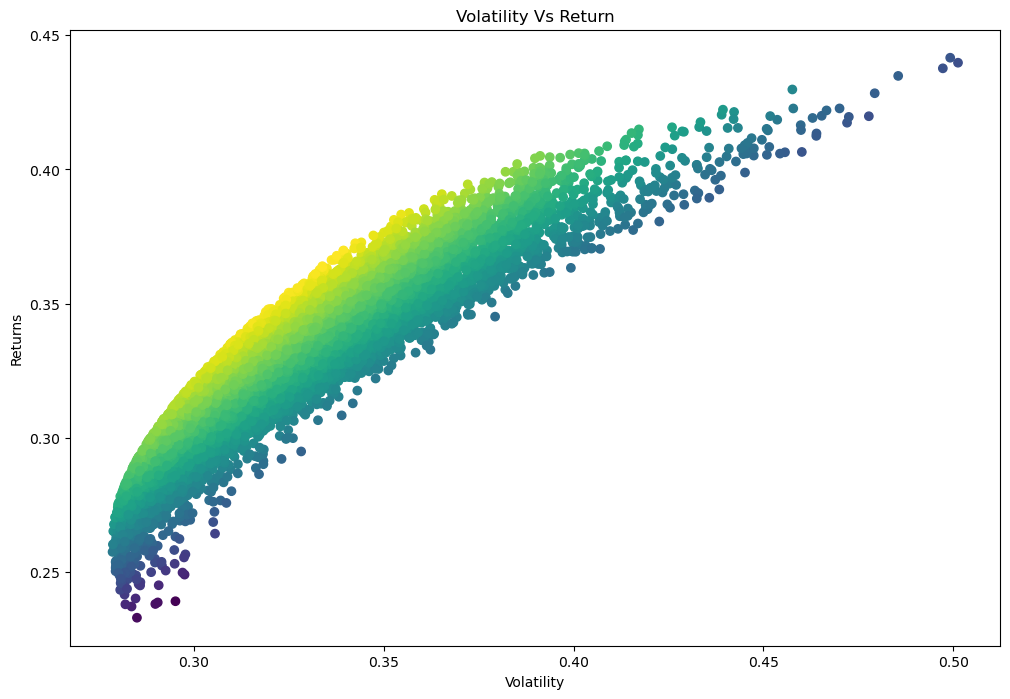

In [68]:
# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array,return_array ,c=sharpe_array, cmap= 'viridis')
plt.title('Volatility Vs Return')
plt.xlabel('Volatility')
plt.ylabel('Returns')
;

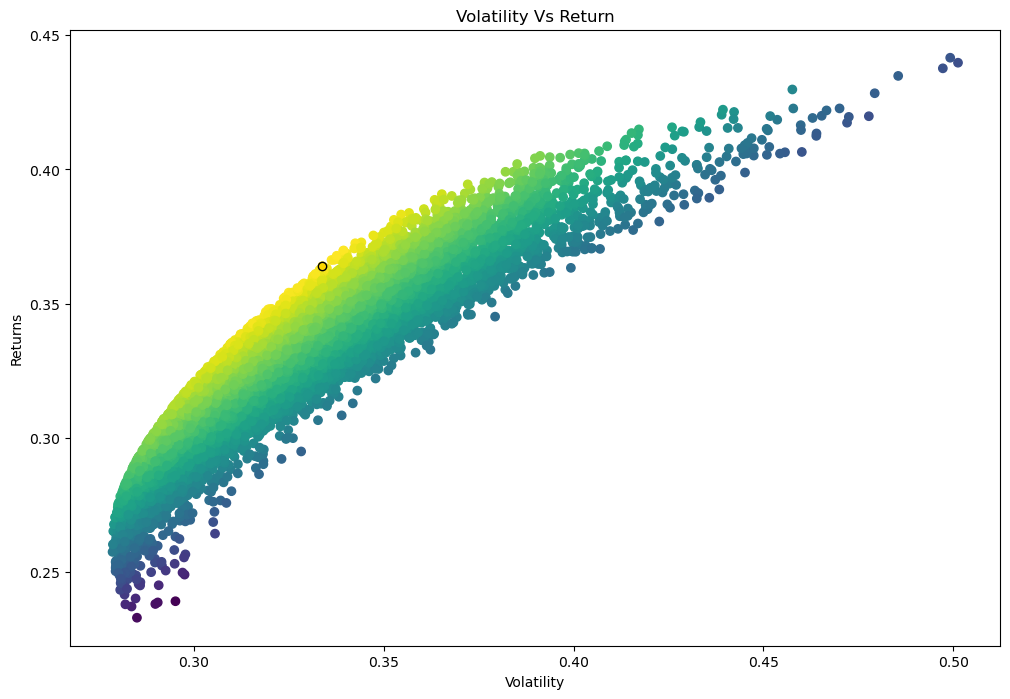

In [71]:
# Identify the optimal portfolio in the returns and volatility arrays
max_sharpe_volatility = volatility_array[index_max_sharpe]
max_sharpe_return = return_array[index_max_sharpe]

# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array,return_array ,c=sharpe_array, cmap= 'viridis')
plt.title('Volatility Vs Return')
plt.xlabel('Volatility')
plt.ylabel('Returns')

# Add the optimal portfolio to the visual
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='gold', edgecolors='black');

THANK YOU  Okundaye Joshua 


In [74]:
x= 10
x!=9

True

In [77]:
np.arange(1,15,2)

array([ 1,  3,  5,  7,  9, 11, 13])

In [80]:
a = 6
b = 6
if a >= b and a != b:
    print('a is greater than b')

In [ ]:
plt.xlim()